In [6]:
from matplotlib import pyplot as plt
import numpy as np

In [63]:
vitesseLibre = 100 # km/h
capacite     = 2000/60 # véh/min/voie
debit        = 4500/60 # véh/min
tempsArret   = 15 # min

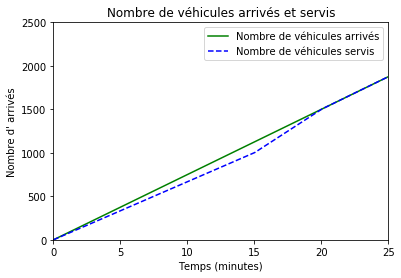

In [104]:
# Exercice 1
# Graphique du nombre de véhicules arrivés et servis jusqu’à la disparition de la file d’attente
t1 = np.arange(0, 15, 0.01)
nombreDeTraitements1 = 2*(capacite)*t1
t2 = np.arange(15, 30, 0.01)
nombreDeTraitements2 = 3*(capacite)*t2-500

nombreDeTraitements = np.concatenate((nombreDeTraitements1,nombreDeTraitements2))
t = np.concatenate((t1,t2))

nombreArrives = debit*t

# Point d'intersection pour déterminer le retour à la circulation normale
idx = np.argwhere(np.diff(np.sign(nombreDeTraitement - nombreArrivees))).flatten()[1]

nombreServis = np.concatenate((nombreDeTraitement[0:idx],nombreArrives[idx:]))

# Décommenter pour observer le nombre de traitements maximums et le point de retour à la normale
# plt.plot(t, nombreDeTraitements, "r-", label = "Nombre de traitements maximum")
# plt.plot(t[idx], tauxDeTraitement[idx], '.k')

plt.plot(t, nombreArrives, "g-", label = "Nombre de véhicules arrivés")
plt.plot(t, nombreServis, "b--", label = "Nombre de véhicules servis")

plt.xlabel('Temps (minutes)')
plt.ylabel("Nombre d' arrivés")
plt.title('Nombre de véhicules arrivés et servis')
plt.legend(loc='best')
plt.axis([0, 25, 0, 2500])
# plt.savefig('Donnees_produites/Figures/graphique_nombre_arrives_servis.eps', format='eps')
plt.show()

In [4]:
# Durée d’existence de la file

In [5]:
# Longueur maximale

In [6]:
# Longueur moyenne

In [8]:
# Le retard total

In [9]:
# Le retard moyen

In [ ]:
# Exercice 2
debit = 4000